In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/Deep Learning"

 1.jpg		        fashion-mnist_test.csv	 Untitled3.ipynb
 2.jpg		        Housing.CSV		 Untitled4.ipynb
 3.jpg		        Untitled		 win2.xls
'Assignment #4.ipynb'   Untitled0.ipynb		 wine1.xls
'Assignment #5.ipynb'   Untitled1.ipynb
 cifar-10-batches-py    Untitled2.ipynb


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# Any results you write to the current directory are saved as output.

In [9]:
housing = pd.read_csv("/content/drive/My Drive/Deep Learning/Housing.CSV")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.dropna(inplace=True)

In [11]:
housing['ocean_proximity'] = housing['ocean_proximity'].astype('category')
# convert to category codes
housing['ocean_proximity'] = housing['ocean_proximity'].cat.codes

In [12]:
scaler = MinMaxScaler()
housing = (housing-housing.min())/(housing.max()-housing.min())
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,0.094381,0.139691,0.689859,0.086651,0.127987,0.100787,0.125850,0.254721,0.330190,0.880282
std,0.112429,0.129326,0.271347,0.077831,0.106240,0.086839,0.105863,0.137158,0.201705,0.285103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035156,0.090909,0.480000,0.045422,0.067358,0.052770,0.067136,0.158673,0.183181,1.000000
50%,0.066406,0.125541,0.720000,0.067549,0.100259,0.078375,0.097455,0.229254,0.298408,1.000000
75%,0.105469,0.151515,0.960000,0.102280,0.149741,0.118670,0.146454,0.331761,0.429317,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split
set_X = housing.drop('median_house_value',axis= 1) # for the input we want all the coulmns but the median_house_value
set_Y = housing['median_house_value'] # for the output we want all the columns 

In [14]:
train_set_X , test_set_X, train_set_Y , test_set_Y = train_test_split(set_X,set_Y , test_size = 0.2 , random_state = 69)

In [15]:
def create_model(lyrs=[8,8], act='relu', opt='Adam', dr=0.0):
    
  
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim = train_set_X.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1,activation='relu'))  # output layer activation='sigmoid')
    
    #Configuration of  the learning process
#     model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])
    model.compile(optimizer='adam',loss='mse' , metrics = ['mae'])
    
    return model

In [16]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None



Mean squared error : 0.10%


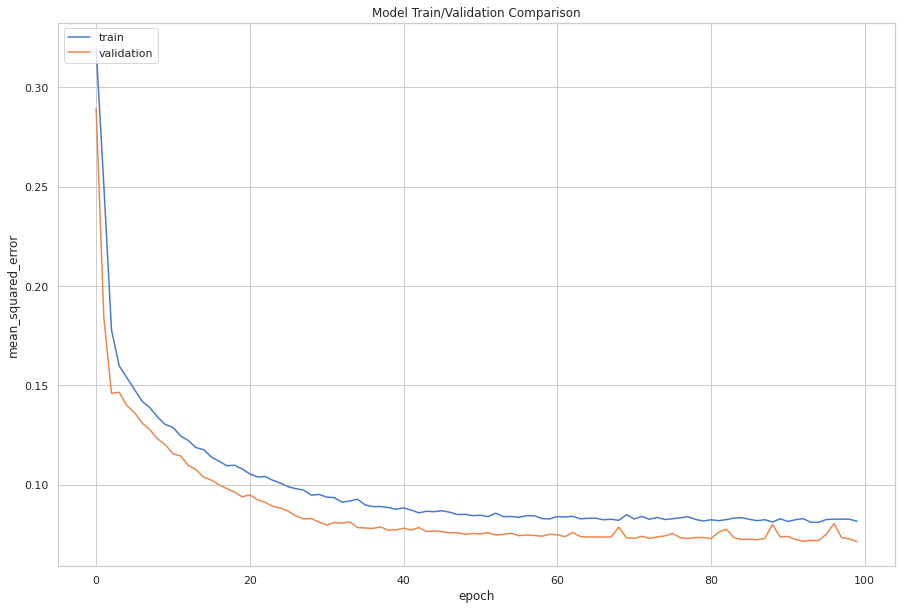

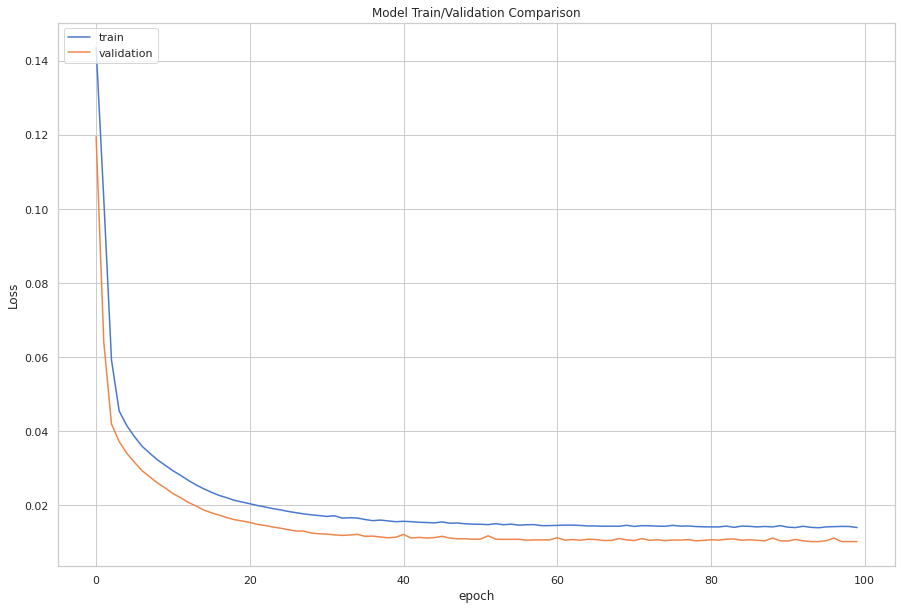

In [17]:
training = model.fit(train_set_X, train_set_Y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['mae'])
print("\n%s: %.2f%%" % ('Mean squared error ', val_acc))

training.history['mae']
# Show model accuracy on graph for comparison
plt.plot(training.history['mae'])
plt.plot(training.history['val_mae'])
plt.title('Model Train/Validation Comparison')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Show model loss on graph for comparison
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Train/Validation Comparison')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
model = KerasRegressor(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [25, 50,100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=0)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(train_set_X, train_set_Y)

In [19]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.015274 using {'batch_size': 16, 'epochs': 50}
-0.064265 (0.067189) with: {'batch_size': 16, 'epochs': 25}
-0.015274 (0.003870) with: {'batch_size': 16, 'epochs': 50}
-0.063159 (0.067929) with: {'batch_size': 16, 'epochs': 100}
-0.057321 (0.061198) with: {'batch_size': 32, 'epochs': 25}
-0.061362 (0.062649) with: {'batch_size': 32, 'epochs': 50}
-0.015320 (0.003917) with: {'batch_size': 32, 'epochs': 100}
-0.025656 (0.005111) with: {'batch_size': 64, 'epochs': 25}
-0.015750 (0.004382) with: {'batch_size': 64, 'epochs': 50}
-0.064340 (0.067088) with: {'batch_size': 64, 'epochs': 100}
